In [29]:
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [30]:
#1 Загрузить таблицу Iris
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
#1 Поместить данные в объект DataFrame библиотеки pandas
iris_dataframe = pd.DataFrame(iris_dataset.data)
iris_dataframe.columns = iris_dataset.feature_names
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
#1 Вычислить корреляции между признаками на всей таблице
iris_dataframe.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [33]:
#1 Вычислить корреляции между признаками отдельно по классам
iris_dataframe['class'] = iris_dataset.target_names[iris_dataset.target] 
grouped = iris_dataframe.groupby(['class']).corr()
grouped


sepal length (cm)  sepal width (cm)  \
class                                                               
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
class                                                              
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Murav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

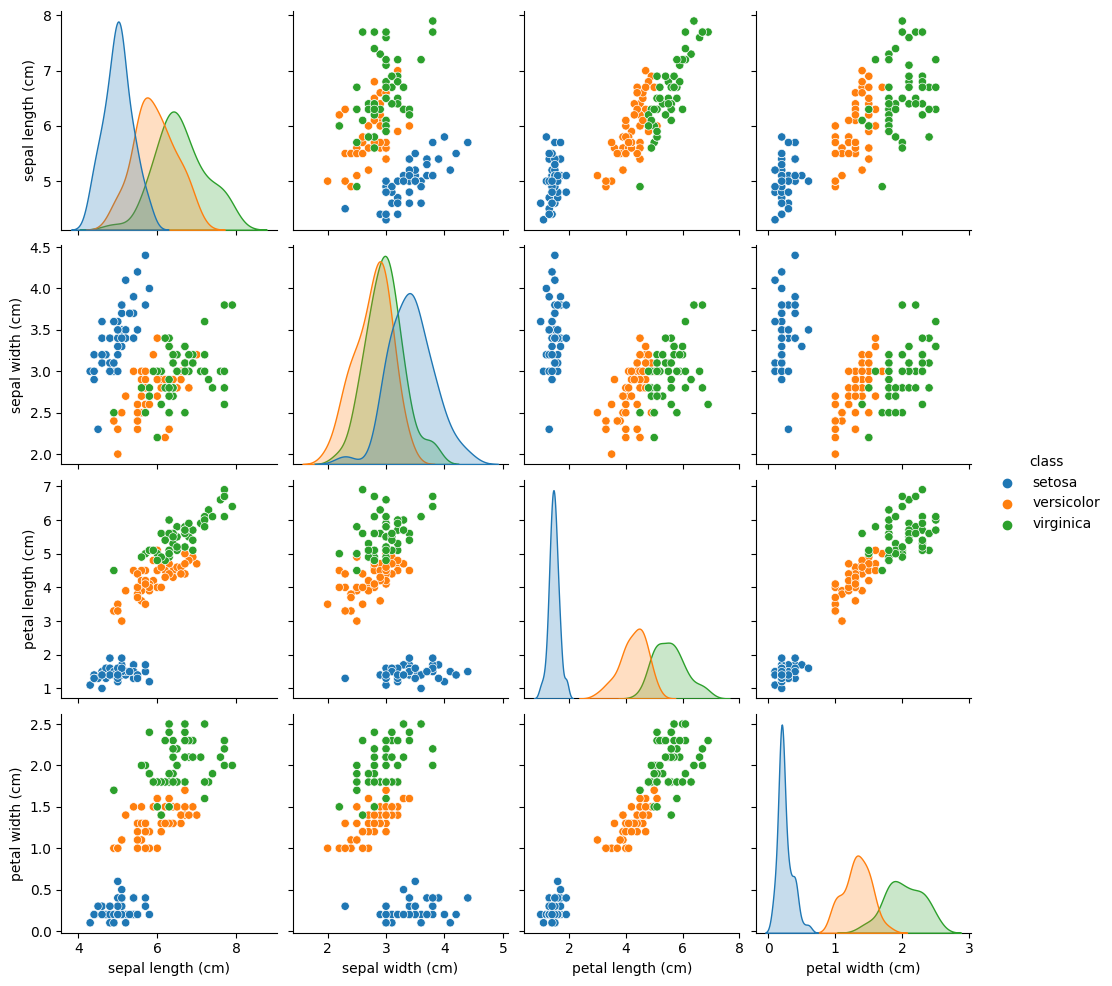

In [34]:
#1 Визуализировать распределения классов на всех парах переменных
seaborn.pairplot(iris_dataframe, hue='class')

In [35]:
#2: Выбрать две переменные: "sepal length (cm)", "petal length (cm)"
iris_subdataframe = iris_dataframe[["sepal length (cm)", "petal length (cm)", "class"]]

X = iris_dataset.data[:,[0,2]]
y = iris_dataset.target

iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [38]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)  

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given train data and labels =  0.9809523809523809


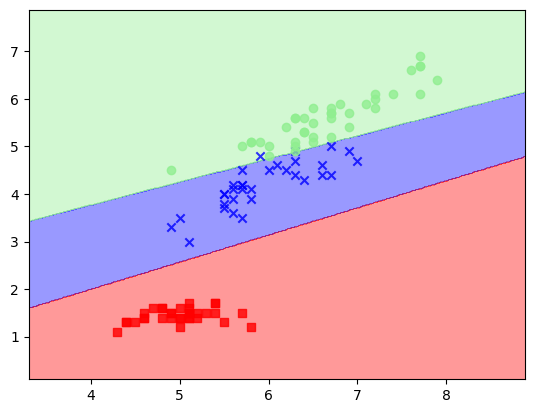

In [39]:
#2 Построить и визуализировать решение методом линейного дискриминанта
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
plot_decision_regions(X_train,y_train,lda)
print("The mean accuracy on the given train data and labels = ",lda.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.9111111111111111


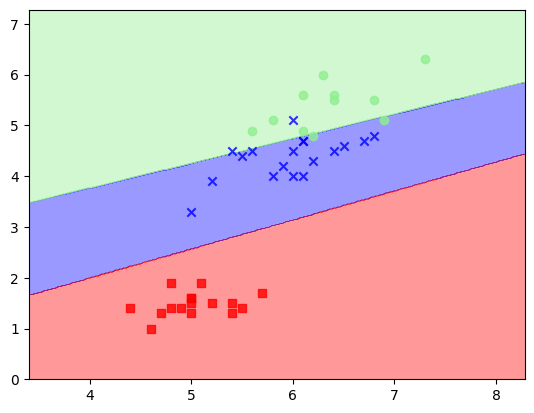

In [40]:
plot_decision_regions(X_test,y_test,lda)
print("The mean accuracy on the given test data and labels = ",lda.score(X_test, y_test))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given train data and labels =  0.9809523809523809


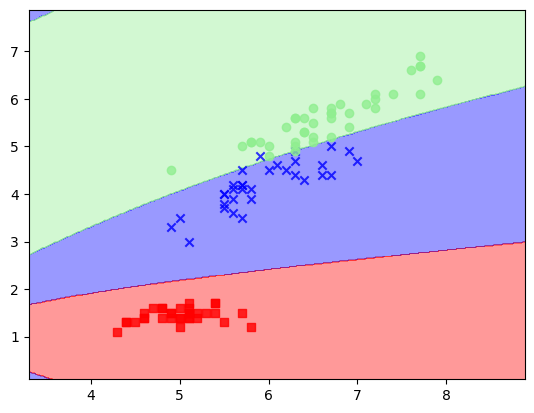

In [41]:
#2 Построить и визуализировать решение методом квадратичного дискриминанта
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
plot_decision_regions(X_train,y_train,qda)
print("The mean accuracy on the given train data and labels = ",qda.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.8888888888888888


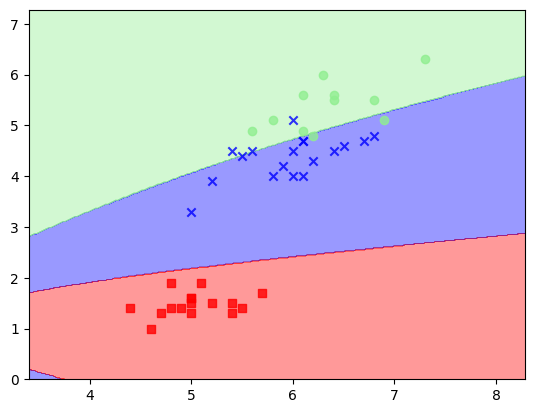

In [42]:
plot_decision_regions(X_test,y_test,qda)
print("The mean accuracy on the given test data and labels = ",qda.score(X_test, y_test))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given train data and labels =  0.9619047619047619


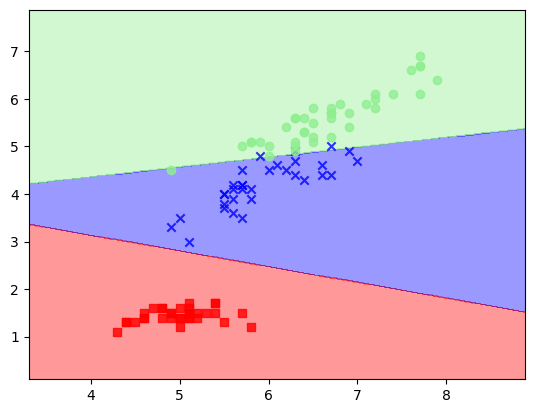

In [43]:
#2 Построить и визуализировать решение методом логистической регрессии
lg = LogisticRegression()
lg.fit(X_train, y_train)
plot_decision_regions(X_train,y_train,lg)
print("The mean accuracy on the given train data and labels = ", lg.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.9555555555555556


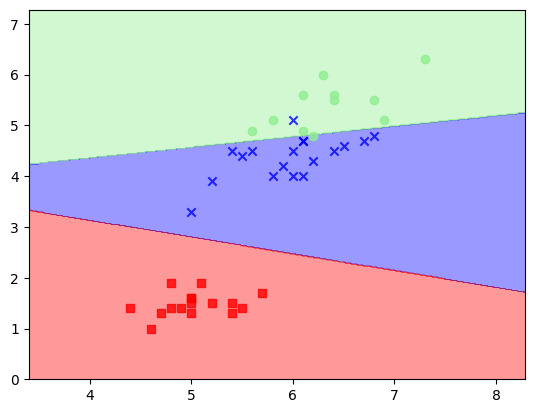

In [44]:
plot_decision_regions(X_test,y_test,lg)
print("The mean accuracy on the given test data and labels = ",lg.score(X_test, y_test))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.9714285714285714


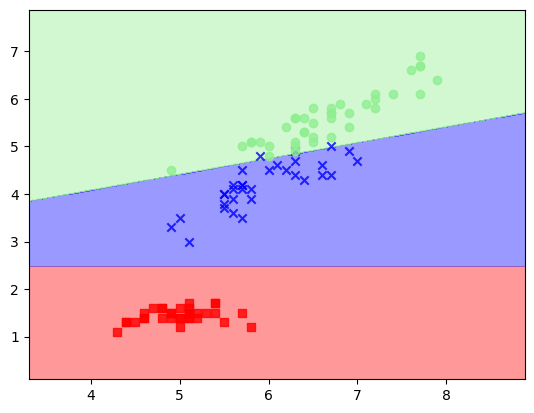

In [45]:
#2 Построить и визуализировать решение методом Support Vector Machine (linear)
linear_svc = svm.SVC(kernel='linear').fit(X_train, y_train)

plot_decision_regions(X_train,y_train, linear_svc)
print("The mean accuracy on the given test data and labels = ", linear_svc.score(X_train, y_train))


C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.9555555555555556


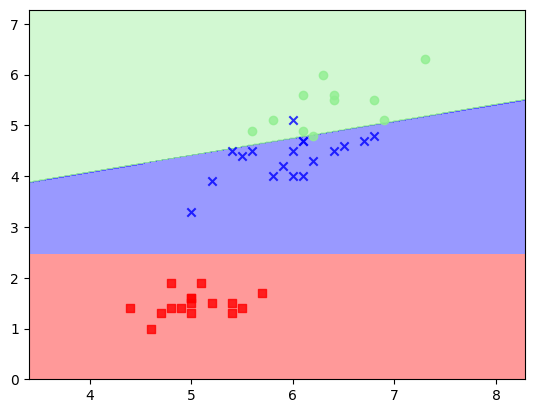

In [46]:
plot_decision_regions(X_test,y_test, linear_svc)
print("The mean accuracy on the given test data and labels = ", linear_svc.score(X_test, y_test))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.9809523809523809


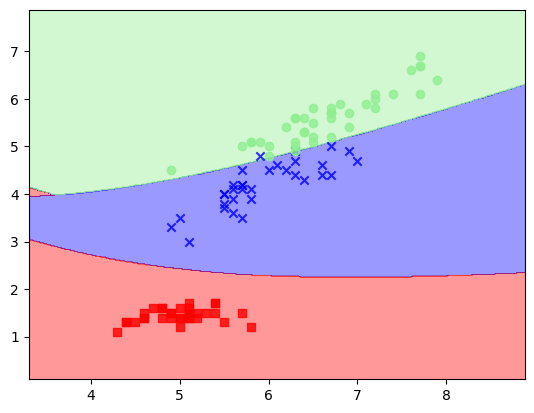

In [47]:
#2 #2 Построить и визуализировать решение методом Support Vector Machine (poly)
poly_svc = svm.SVC(kernel='poly').fit(X_train, y_train)

plot_decision_regions(X_train,y_train, poly_svc)
print("The mean accuracy on the given test data and labels = ", poly_svc.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


The mean accuracy on the given test data and labels =  0.9333333333333333


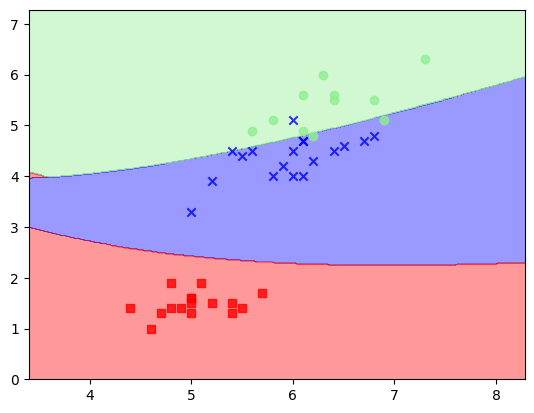

In [48]:
plot_decision_regions(X_test,y_test, poly_svc)
print("The mean accuracy on the given test data and labels = ", poly_svc.score(X_test, y_test))

In [49]:
#3 Исключаю класс 0 ('setosa')
two_classes_df = pd.DataFrame(iris_dataset.data)
two_classes_df.columns = iris_dataset.feature_names
two_classes_df["class"] = iris_dataset.target
two_classes_df = two_classes_df[two_classes_df["class"] != 0]
X = iris_dataset.data[50:,:]
y = two_classes_df["class"]

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


0.7571428571428571


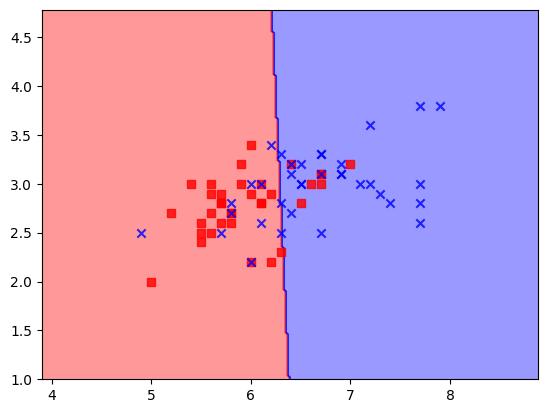

In [50]:
#3 Построить линейный дискриминант на всех переменных (0,1)
X_train, X_test, y_train, y_test = train_test_split(X[:,[0,1]], y, test_size=.3, random_state=0)
lda.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, lda)
print(lda.score(X_train, y_train))


C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


0.9571428571428572


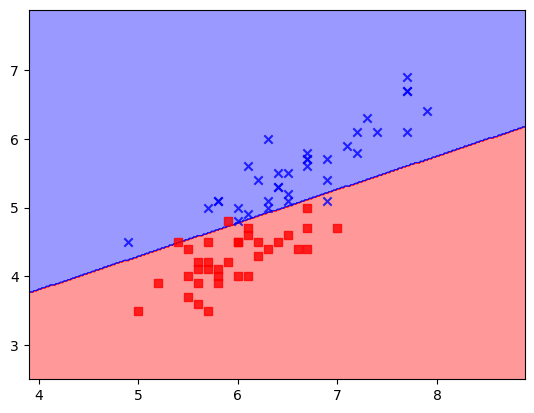

In [51]:
#3 Построить линейный дискриминант на всех переменных (0,2)
X_train, X_test, y_train, y_test = train_test_split(X[:,[0,2]], y, test_size=.3, random_state=0)
lda.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, lda)
print(lda.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


0.9


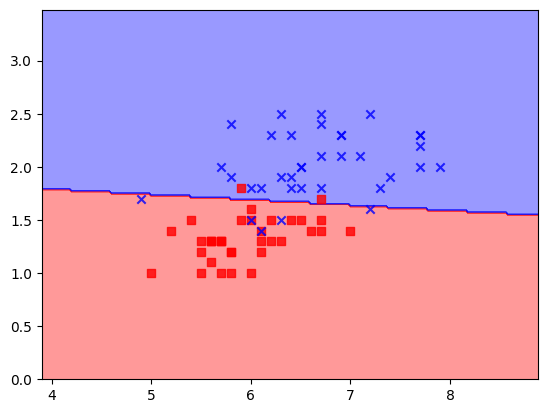

In [52]:
#3 Построить линейный дискриминант на всех переменных (0,3)
X_train, X_test, y_train, y_test = train_test_split(X[:,[0,3]], y, test_size=.3, random_state=0)
lda.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, lda)
print(lda.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


0.9428571428571428


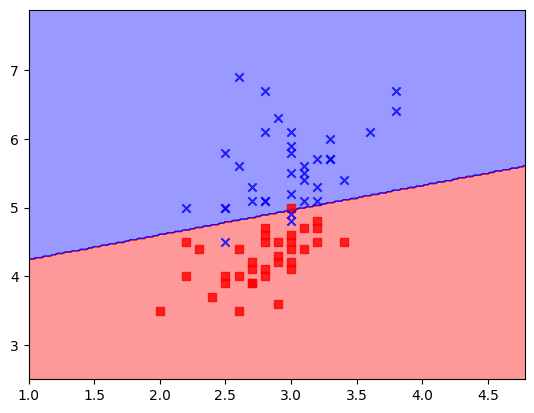

In [53]:
#3 Построить линейный дискриминант на всех переменных (1,2)
X_train, X_test, y_train, y_test = train_test_split(X[:,[1,2]], y, test_size=.3, random_state=0)
lda.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, lda)
print(lda.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


0.9285714285714286


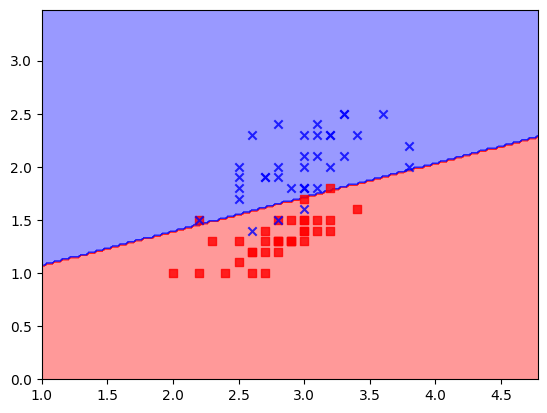

In [54]:
#3 Построить линейный дискриминант на всех переменных (1,3)
X_train, X_test, y_train, y_test = train_test_split(X[:,[1,3]], y, test_size=.3, random_state=0)
lda.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, lda)
print(lda.score(X_train, y_train))

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


0.9285714285714286


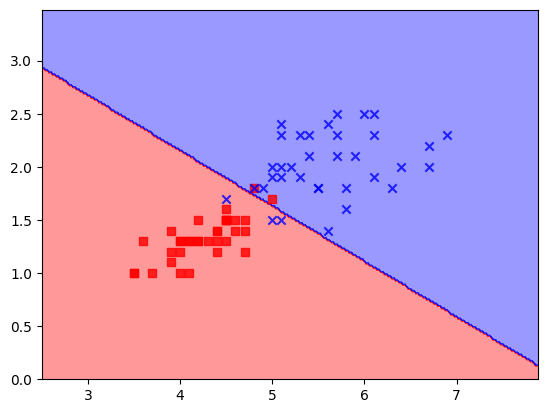

In [55]:
#3 Построить линейный дискриминант на всех переменных (2,3)
X_train, X_test, y_train, y_test = train_test_split(X[:,[2,3]], y, test_size=.3, random_state=0)
lda.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, lda)
print(lda.score(X_train, y_train))

In [56]:
#4 MyQuadraticDiscriminantAnalysis
class MyQuadraticDiscriminantAnalysis:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean_vectors = []
        self.cov_matrices = []
        for cl in self.classes:
            X_class = X[y == cl]
            mean_vector = np.mean(X_class, axis=0)
            cov_matrix = np.cov(X_class, rowvar=False)
            self.mean_vectors.append(mean_vector)
            self.cov_matrices.append(cov_matrix)
    
    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = []
            zipped = zip(self.mean_vectors, self.cov_matrices)
            for mean_vector, cov_matrix in zipped:
                diff = x - mean_vector
                class_prob = - 0.5 * np.log(np.linalg.det(cov_matrix)) - 0.5 * np.sum(np.linalg.solve(cov_matrix, diff) * diff, axis=0) + np.log(len(self.classes))
                class_probs.append(class_prob)
            predicted_class = np.argmax(class_probs)
            predictions.append(predicted_class)
        return np.array(predictions)

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


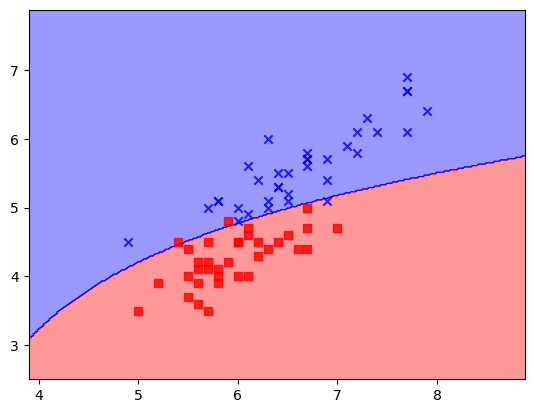

In [57]:
# MyQuadraticDiscriminantAnalysis тест
qda = MyQuadraticDiscriminantAnalysis()
X_train, X_test, y_train, y_test = train_test_split(X[:, [0,2]], y, test_size=.3, random_state=0)
qda.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, qda)

C:\Users\Murav\AppData\Local\Temp\ipykernel_10148\2588205909.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


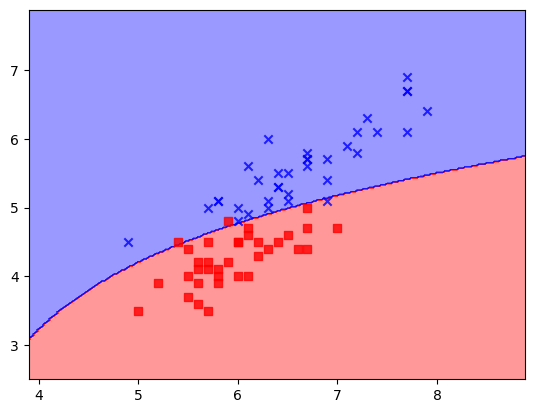

In [58]:
#3 Сравнение с библиотечной реализацией
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, qda)